In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
 # -*- coding: utf-8 -*-
"""
Created on Tue Aug  8 16:27:18 2023

@author: HP
"""

"""
for image processing we will not usde dense layer because for dense layer we have to convert he vector to 1d
by this most of he essential features will be lost

"""

from matplotlib.pyplot import imshow
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy import ndimage
import os

from tensorflow.keras.utils import img_to_array#to convert the image to array
from tensorflow.keras.layers import Input,Dense,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from tensorflow.keras.models import Sequential,Model

np.random.seed(42)

SIZE1,SIZE2=258,194
SIZE1,SIZE2=258,194
SIZE3_1,SIZE3_2=129,97

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 258, 194, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 258, 194, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 258, 194, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 conv2d_2 (Conv2D)           (None, 258, 194, 64)         1792      ['input_2[0][0]']             
                                                                                              

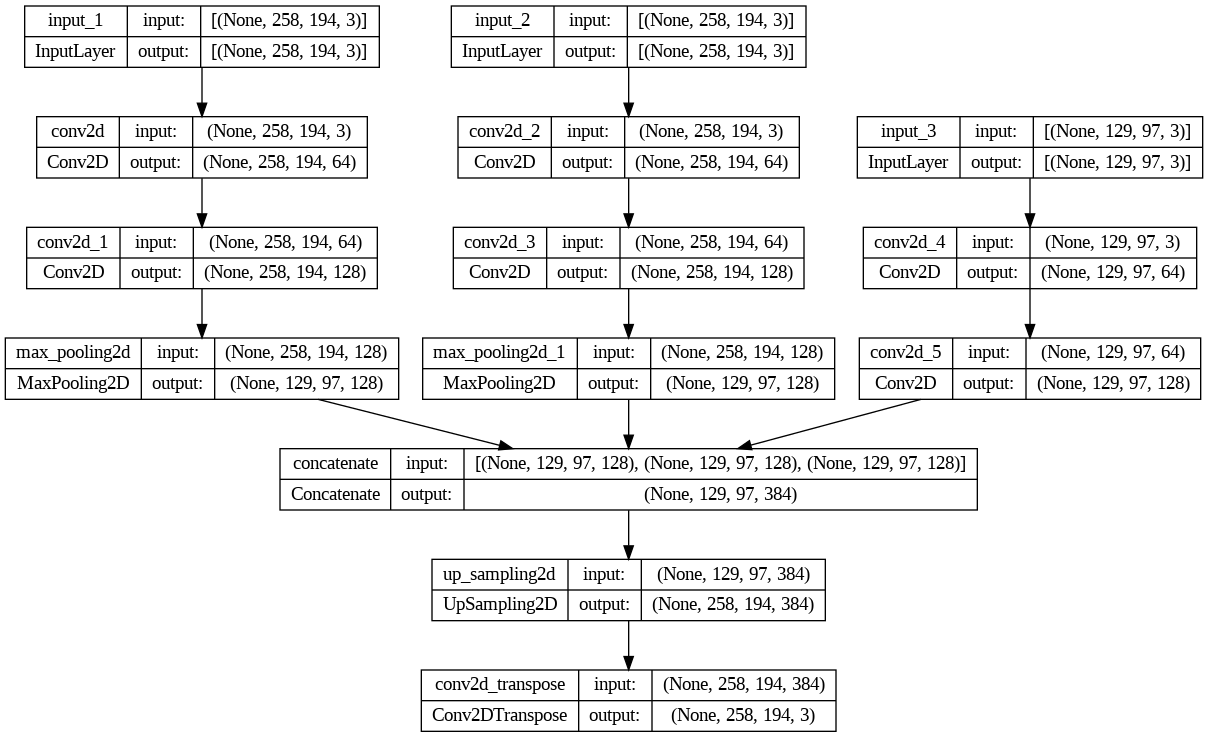

In [3]:


# Define the input layers for each of the three models
input1 = Input(shape=(SIZE1, SIZE2, 3))
input2 = Input(shape=(SIZE1, SIZE2, 3))
input3 = Input(shape=(SIZE3_1, SIZE3_2, 3))

#for 1st enlarged image


x=Conv2D(64,(3,3),activation='relu',padding='same')(input1)
x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
#x=Conv2D(256,(3,3),activation='relu',padding='same')(x)
x=MaxPooling2D((2,2),padding='same')(x)


#for 2nd enlarged image


y=Conv2D(64,(3,3),activation='relu',padding='same')(input2)
y=Conv2D(128,(3,3),activation='relu',padding='same')(y)
#y=Conv2D(256,(3,3),activation='relu',padding='same')(y)
y=MaxPooling2D((2,2),padding='same')(y)



#for the orginal image

z=Conv2D(64,(3,3),activation='relu',padding='same')(input3)
z=Conv2D(128,(3,3),activation='relu',padding='same')(z)
#z=Conv2D(256,(3,3),activation='relu',padding='same')(z)




#concatinate
from keras.layers import concatenate, Flatten, Dense

# Assuming the output shapes are compatible for concatenation
merged = concatenate([x,y,z],axis=3)

#model=Model([input1,input2,input3],merged)
#model.summary()
#tf.keras.utils.plot_model(model,show_shapes=True)


xx=UpSampling2D((2,2))(merged)
xx=Conv2DTranspose(3,(3,3),activation='sigmoid',padding='same')(xx)#3 for RGB
model=Model([input1,input2,input3],xx)
model.summary()


tf.keras.utils.plot_model(model,show_shapes=True)

In [4]:



def reduceSize(im):



    width,height = im.shape[:2]

    resized_image = cv2.resize(image, (height // 2, width // 2))

            #print(f'Resized {filename}')

    return resized_image

def bicubic(im):

    scaling_factor = 2

    enlarged_image = ndimage.zoom(im, (scaling_factor, scaling_factor,1), order=3)
    return enlarged_image

def spline(im):

    low_res_image = im

    scaling_factor = 2

    high_res_shape = (low_res_image.shape[0] * scaling_factor, low_res_image.shape[1] * scaling_factor)

    high_res_image = ndimage.zoom(im, (scaling_factor, scaling_factor, 1), order=3)

    return high_res_image


input_directory = '/content/drive/MyDrive/SuperResolution/fingerprint'
all_images_list1 = []
all_images_list2=[]
all_images_list3=[]
orginal_image=[] #y
for filename in os.listdir(input_directory):
        #print(filename)
        path=os.path.join(input_directory, filename)
        image = cv2.imread(path)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        img = cv2.resize(image, (194,258))
        img=img.astype('int')/255.
        print(img.shape)
        orginal_image.append(img)
        resized_image=img
        resized_image=reduceSize(img)
        bicubic_image=bicubic(resized_image)
        print("Bicubic",bicubic_image.shape)
        spline_image=spline(resized_image)
        print("Spline",spline_image.shape)
        all_images_list1.append(bicubic_image)
        all_images_list2.append(spline_image)
        all_images_list3.append(resized_image)

all_images_list1=np.array(all_images_list1)
all_images_list2=np.array(all_images_list2)
all_images_list3=np.array(all_images_list3)
orginal_image=np.array(orginal_image)
print(all_images_list1.shape)
print(all_images_list2.shape)
print(all_images_list3.shape)
print(orginal_image.shape)


(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194

In [5]:
x=model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 258, 194, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 258, 194, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 258, 194, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 conv2d_2 (Conv2D)           (None, 258, 194, 64)         1792      ['input_2[0][0]']             
                                                                                              

In [6]:
model.fit([all_images_list1,all_images_list2,all_images_list3],orginal_image,epochs=30,shuffle=True)

Epoch 1/30
3/3 [==============================] - 127s 37s/step - loss: 18.7706 - accuracy: 0.3899
Epoch 2/30
3/3 [==============================] - 122s 37s/step - loss: 9.8836 - accuracy: 0.0019
Epoch 3/30
3/3 [==============================] - 121s 37s/step - loss: 8.0606 - accuracy: 0.9987
Epoch 4/30
3/3 [==============================] - 131s 41s/step - loss: 3.8392 - accuracy: 0.8751
Epoch 5/30
3/3 [==============================] - 119s 35s/step - loss: 2.0723 - accuracy: 0.0049
Epoch 6/30
3/3 [==============================] - 118s 34s/step - loss: 1.8119 - accuracy: 0.0105
Epoch 7/30
3/3 [==============================] - 117s 35s/step - loss: 1.0593 - accuracy: 0.8622
Epoch 8/30
3/3 [==============================] - 118s 36s/step - loss: 1.1853 - accuracy: 0.2599
Epoch 9/30
3/3 [==============================] - 123s 39s/step - loss: 1.0317 - accuracy: 0.3876
Epoch 10/30
3/3 [==============================] - 118s 36s/step - loss: 0.8112 - accuracy: 0.7202
Epoch 11/30
3/3 [=

In [ ]:
y_pred=model.predict([all_images_list1,all_images_list2,all_images_list3])
print(y_pred[0].shape)
imshow((y_pred[5]*255).astype(np.uint8))
imshow((orginal_image[5]*255).astype(np.uint8))

In [ ]:
imshow((orginal_image[0]*255).astype(np.uint8))

In [ ]:
imshow((y_pred[0]*255).astype(np.uint8))

In [ ]:
imshow((all_images_list3[0]).astype(np.uint8))

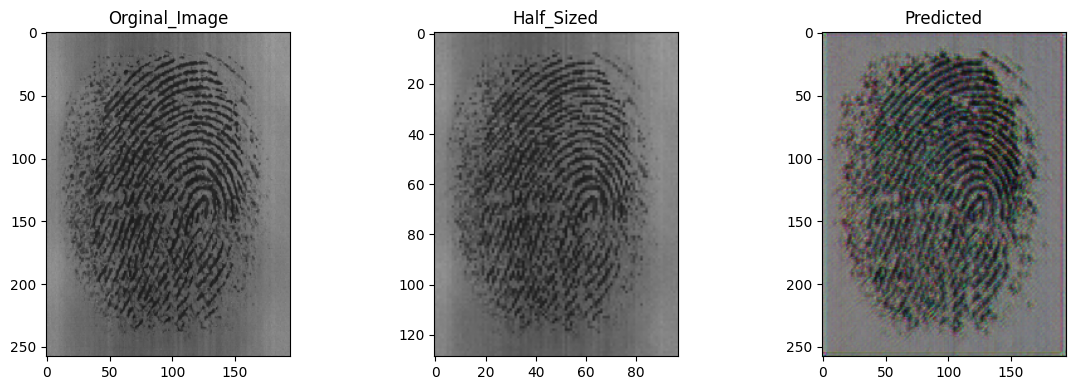

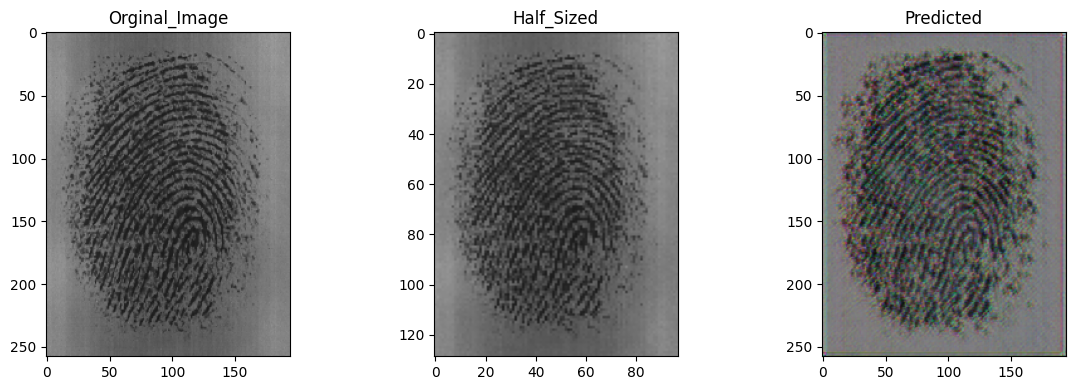

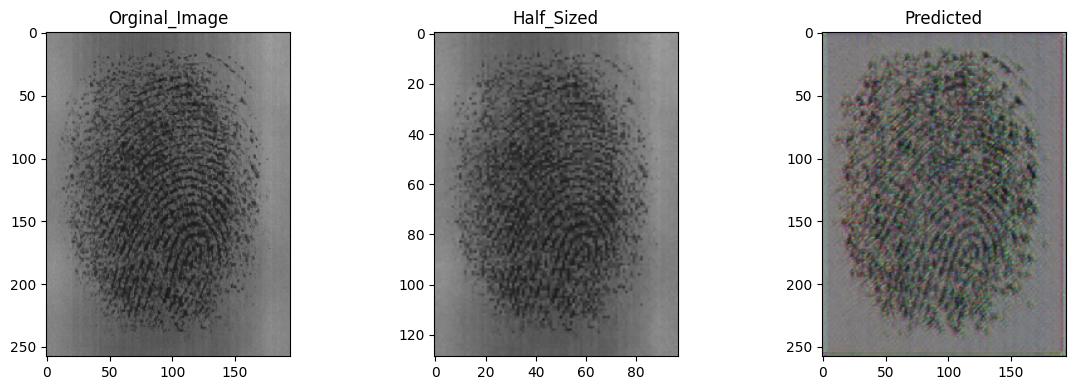

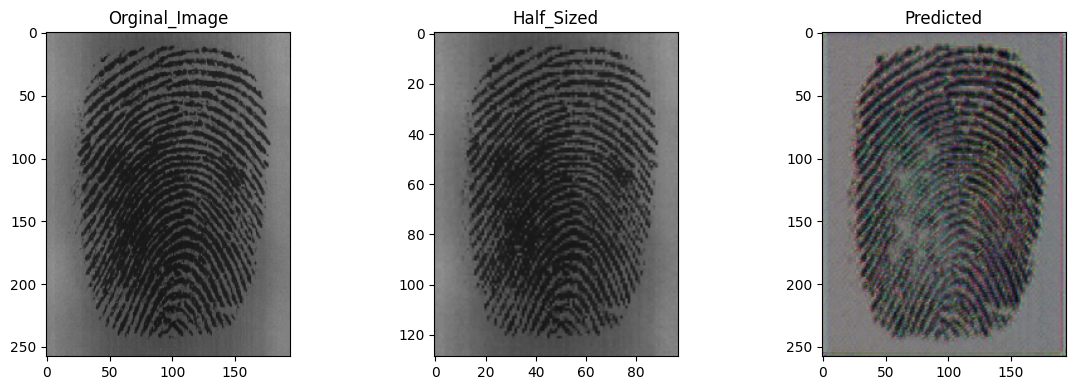

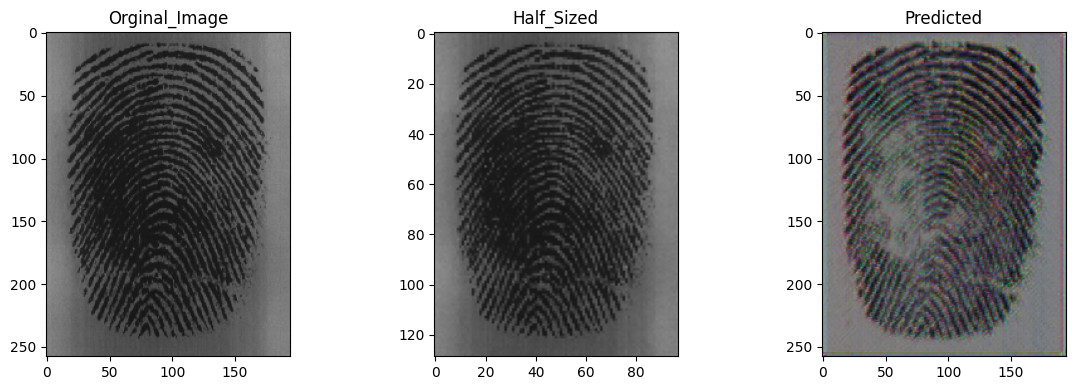

In [62]:
from pandas.io.formats.printing import PrettyDict
import matplotlib.pyplot as plt
import numpy as np
for i in range (0,5):
  orginal = orginal_image[i]
  halfsized = all_images_list3[i]
  pred = y_pred[i]

  fig, axs = plt.subplots(1, 3, figsize=(12, 4))

  axs[0].imshow(orginal, cmap='gray')
  axs[0].set_title('Orginal_Image')

  axs[1].imshow(halfsized, cmap='gray')
  axs[1].set_title('Half_Sized')

  axs[2].imshow(pred, cmap='gray')
  axs[2].set_title('Predicted')

  plt.tight_layout()

  plt.show()


KeyboardInterrupt: ignored

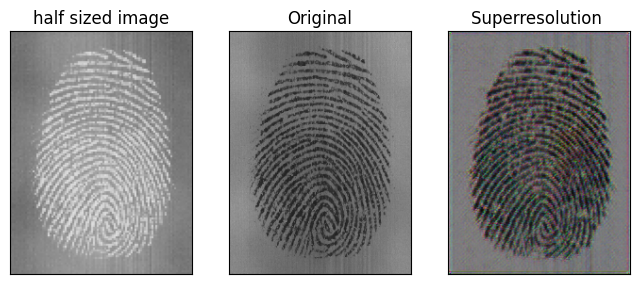

In [11]:

all_images_list3_1 =all_images_list3
orginal_image_1 = orginal_image*255
y_pred_1 = y_pred*255


fig, ax = plt.subplots(1, 3, figsize=(8, 8))

for i, (p_img, t_img, r_img) in enumerate(zip(all_images_list3_1, orginal_image_1, y_pred_1)):

    #p_img = cv2.resize(p_img, (img_spec_x, img_spec_y))
    ax[0].imshow(p_img.astype(np.uint8), cmap="gray")
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[0].set_title("half sized image")

    #t_img = cv2.resize(t_img, (img_spec_x, img_spec_y))
    ax[1].imshow(t_img.astype(np.uint8), cmap="gray")
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    ax[1].set_title("Original")

    #r_img = cv2.resize(r_img, (img_spec_x, img_spec_y))
    ax[2].imshow(r_img.astype(np.uint8))
    ax[2].set_xticks([])
    ax[2].set_yticks([])
    ax[2].set_title("Superresolution ")


    plt.savefig('/content/drive/MyDrive/SuperResolution_'+str(i), dpi=300)


In [32]:
# Calculate PSNR

import cv2
import numpy as np

# Load original and processed images
original_image = cv2.imread('/content/drive/MyDrive/SuperResolution/orginal.png')
processed_image = cv2.imread('/content/drive/MyDrive/SuperResolution/processed.png')

mse = np.mean((original_image - processed_image) ** 2)


MAX = 255
psnr = 10 * np.log10((MAX ** 2) / mse)

print(f'PSNR: {psnr} dB')


PSNR: 30.019335915224268 dB


In [38]:
#SSIM
from skimage import io, color
from skimage.metrics import structural_similarity as ssim


original_image = io.imread('/content/drive/MyDrive/SuperResolution/orginal.png')
processed_image = io.imread('/content/drive/MyDrive/SuperResolution/processed.png')

if original_image.shape[-1] == 4:
    original_image = original_image[:, :, :3]

if processed_image.shape[-1] == 4:
    processed_image = processed_image[:, :, :3]

original_image_gray = color.rgb2gray(original_image)
processed_image_gray = color.rgb2gray(processed_image)

# Calculate SSIM
ssim_score = ssim(original_image_gray, processed_image_gray)

print(f'SSIM Score: {ssim_score}')


SSIM Score: 0.8243078390186491


In [44]:
# Calculate MSE
import numpy as np
from sklearn.metrics import mean_squared_error

y_flat = orginal_image.flatten()
ypred_flat = y_pred.flatten()

mse = mean_squared_error(y_flat, ypred_flat)

print(f'Mean Squared Error (MSE): {mse}')


Mean Squared Error (MSE): 0.010221753466495414


In [45]:
import numpy as np

individual_ratings = [4.2, 3.8, 4.5, 3.6, 4.0]

mos = np.mean(individual_ratings)

print(f"Mean Opinion Score (MOS): {mos}")


Mean Opinion Score (MOS): 4.0200000000000005
